In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import ast
import csv
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("imdb.csv")
df=df.rename(columns={'id': 'unique_id'})
df.columns

Index(['unique_id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [3]:
df.isnull().sum()

unique_id                   0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [4]:
df_to_dict = df.to_dict(orient = 'records')

In [5]:
def perfectEval(anonstring):
        try:
            ev = ast.literal_eval(anonstring)
            return ev
        except ValueError:
            corrected = "\'" + str(anonstring) + "\'"
            ev = ast.literal_eval(corrected)
            return ev

## q1

### Which are the genres with the highest number of movies? (Note that a movie may have more than one genre)

In [6]:
split_dictionary = []
for j in df_to_dict:
    split_subdict = []
    for i in perfectEval(j['genres']):
        #split_one.append(i)
        new_one = {'unique_id': j['unique_id'], 'genres':i}
        split_subdict.append(new_one)
    split_dictionary.append(split_subdict)
# print(split_dictionary)
flat_split_dictionary = [item for sublist in split_dictionary for item in sublist]
dict_to_df = pd.DataFrame.from_records(flat_split_dictionary)
final_df = pd.concat([dict_to_df.drop(['genres'], axis=1), dict_to_df['genres'].apply(pd.Series)], axis=1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

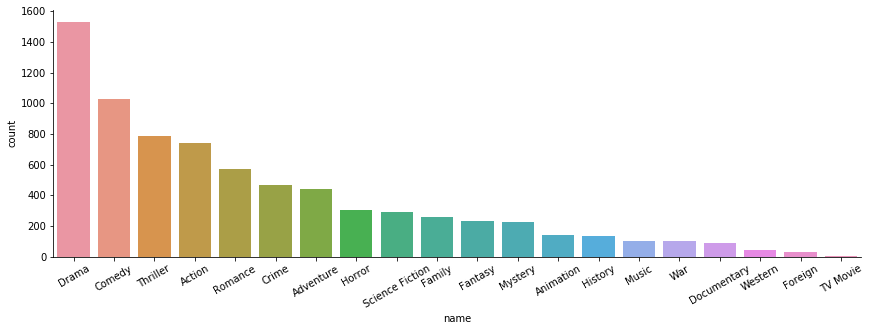

In [7]:
plot_order = final_df.groupby('name')['unique_id'].count().sort_values(ascending=False).index.values
ax=sns.catplot(data=final_df, x='name',kind='count',ci=None, legend_out=False, order=plot_order,height=4,aspect=3)
plt.xticks(rotation=30)



## q2

### Which are the genres with the highest average revenue/budget ratio for a movie? (i.e. which genres are the most rewarding ones in terms of income for the company?)

In [8]:
df_ratio = df[(df['budget']>10000) & (df['revenue']>10000)]
df_ratio['ratio']=df_ratio['revenue']/df_ratio['budget']
result=pd.merge(df_ratio, final_df, on='unique_id')[['unique_id','ratio','name']]
result

/home/farzaneh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,unique_id,ratio,name
0,1,0.879618,Comedy
1,2,2.378736,Comedy
2,2,2.378736,Drama
3,2,2.378736,Family
4,2,2.378736,Romance
...,...,...,...
5612,2999,4.094366,Comedy
5613,2999,4.094366,Romance
5614,3000,2.345347,Thriller
5615,3000,2.345347,Action


(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08,  4.0e+08]),
 <a list of 10 Text xticklabel objects>)

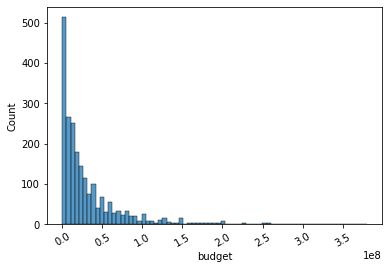

In [9]:
ax=sns.histplot(data=df_ratio, x="budget")
plt.xticks(rotation=30)

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09,  1.4e+09,  1.6e+09]),
 <a list of 10 Text xticklabel objects>)

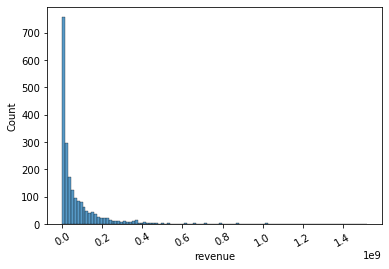

In [10]:
ax=sns.histplot(data=df_ratio, x="revenue")
plt.xticks(rotation=30)

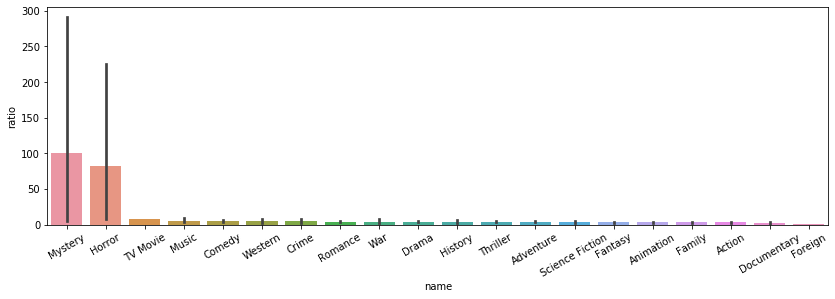

In [11]:
fig, ax = plt.subplots(figsize=(14,4))

plot_order = result.groupby('name')['ratio'].mean().sort_values(ascending=False).index.values
# ax=sns.barplot(data=result, x='name',y='ratio')
# ax.fig.set_figwidth(20)
# ax.fig.set_figheight(4)
# 
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

sns.barplot(x="name", y="ratio", data=result,order=plot_order,ax=ax)
# plt.show()
# ax.set_size_inches( 16, 10)

# result.groupby('name')['ratio'].std().sort_values(ascending=False)

### Although the average ration for Mystery and Horror is high, the std is too much as well. There might be outliers and so on. We need more exploration to make sure about that

In [12]:
result['ratio'].sort_values(ascending=False)

2267    12890.386667
2266    12890.386667
3149     4133.333333
3150     4133.333333
3526      500.000000
            ...     
562         0.001289
563         0.001289
916         0.001076
917         0.001076
918         0.001076
Name: ratio, Length: 5617, dtype: float64

### Let's drop rows with ratio grater than 100!

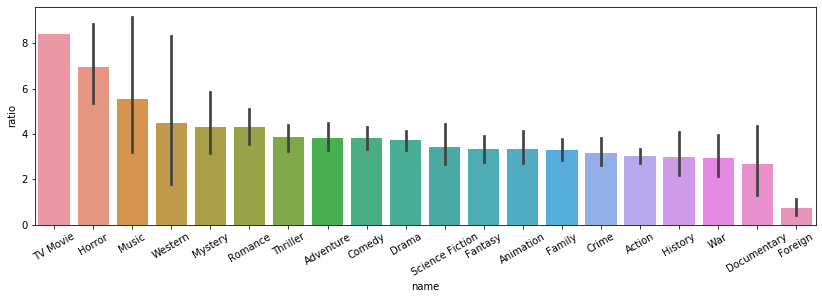

In [13]:
fig, ax = plt.subplots(figsize=(14,4))
result=result[result['ratio']<100]
plot_order = result.groupby('name')['ratio'].mean().sort_values(ascending=False).index.values
# ax=sns.barplot(data=result, x='name',y='ratio')
# ax.fig.set_figwidth(20)
# ax.fig.set_figheight(4)
# 
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

sns.barplot(x="name", y="ratio", data=result,order=plot_order,ax=ax)
# plt.show()
# ax.set_size_inches( 16, 10)

# result.groupby('name')['ratio'].std().sort_values(ascending=False)

##  q3

###  Sort the production companies by the number of movies made. (Note that a movie may have more than one production company)

In [14]:
split_dictionary = []
for j in df_to_dict:
    split_subdict = []
    for i in perfectEval(j['production_companies']):
        #split_one.append(i)
        new_one = {'unique_id': j['unique_id'], 'production_companies':i}
        split_subdict.append(new_one)
    split_dictionary.append(split_subdict)
# print(split_dictionary)
flat_split_dictionary = [item for sublist in split_dictionary for item in sublist]
dict_to_df = pd.DataFrame.from_records(flat_split_dictionary)
final_df1 = pd.concat([dict_to_df.drop(['production_companies'], axis=1), dict_to_df['production_companies'].apply(pd.Series)], axis=1)

###  Top ten companies by the number of productions

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

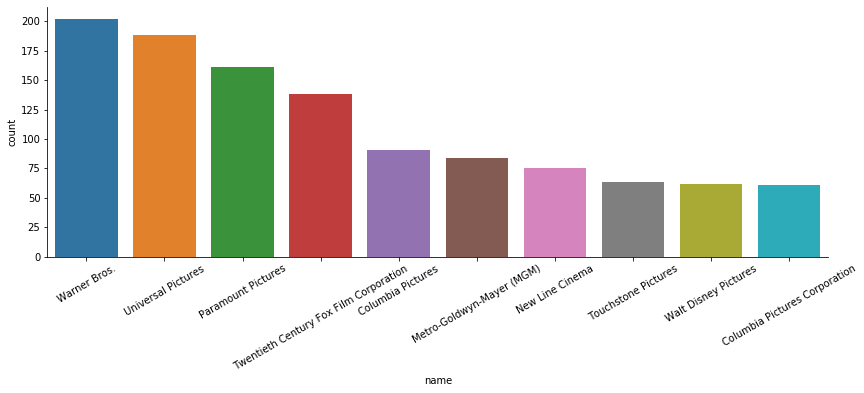

In [15]:
plot_order = final_df1.groupby('name')['unique_id'].count().sort_values(ascending=False).iloc[:10].index
ax=sns.catplot(data=final_df1, x='name',kind='count',ci=None, legend_out=False, order=plot_order,height=4,aspect=3)
plt.xticks(rotation=30)


# final_df1.groupby('name')['unique_id'].count().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(14,4))

## q4

### Provide a plot of average revenue/budget ratio in different years. (X-axis would be years and Y-axis would be the average revenue/budget ratio)

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])
import datetime

def fix_date(x):

    if x.year > 2021:

        year = x.year - 100

    else:

        year = x.year

    return datetime.date(year,x.month,x.day)


df['release_date'] = df['release_date'].apply(fix_date)

df['year'] = pd.DatetimeIndex(df['release_date']).year

result = pd.concat([df_ratio, df], axis=1)
result=result[result['ratio']<100]


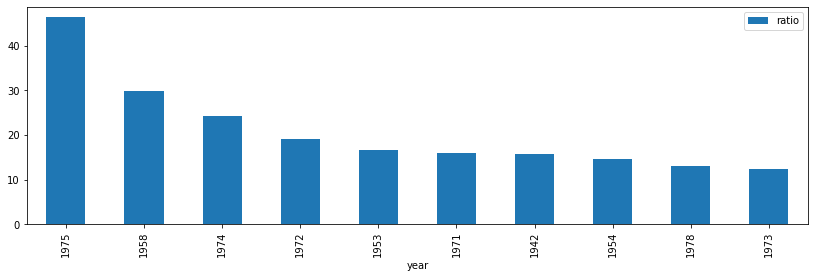

In [20]:
result['ratio']
x=result.groupby('year')['ratio'].mean().to_frame()
x=x.reset_index()
x.sort_values(by='ratio',ascending=False).head(10).plot(x='year',y='ratio',kind='bar',figsize=(14,4))
plt.show()

## q5

### Group all movies into different subgroups based on budget, revenue and popularity. (Drop the movies with budget or revenue lower than 10000, these are unknown values) Explain how you choose the number of these groups. Can you provide an explanation about each group?

#### for this part I look at boxplot  and histogram for the three features. The calssification of users might be more analytical and based on the some statistical measures such as median and so on.

In [21]:
df5=df[['unique_id','budget','revenue','popularity']]
df5 = df5[(df5['budget']>10000) & (df5['revenue']>10000)]

(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08,  4.0e+08]),
 <a list of 10 Text xticklabel objects>)

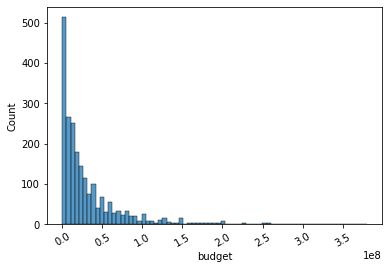

In [22]:
ax=sns.histplot(data=df5, x="budget")
plt.xticks(rotation=30)

(array([-5.0e+07,  0.0e+00,  5.0e+07,  1.0e+08,  1.5e+08,  2.0e+08,
         2.5e+08,  3.0e+08,  3.5e+08,  4.0e+08]),
 <a list of 10 Text xticklabel objects>)

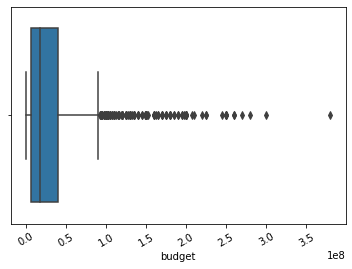

In [23]:
ax=sns.boxplot(data=df5, x="budget")
plt.xticks(rotation=30)

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09,  1.4e+09,  1.6e+09]),
 <a list of 10 Text xticklabel objects>)

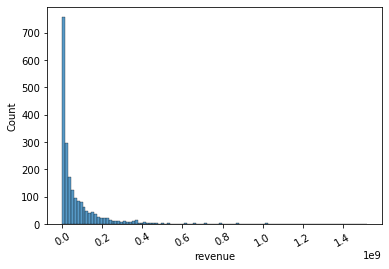

In [24]:
ax=sns.histplot(data=df5, x="revenue")
plt.xticks(rotation=30)

(array([-2.0e+08,  0.0e+00,  2.0e+08,  4.0e+08,  6.0e+08,  8.0e+08,
         1.0e+09,  1.2e+09,  1.4e+09,  1.6e+09]),
 <a list of 10 Text xticklabel objects>)

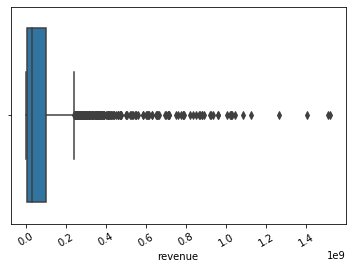

In [25]:
ax=sns.boxplot(data=df5, x="revenue")
plt.xticks(rotation=30)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text xticklabel objects>)

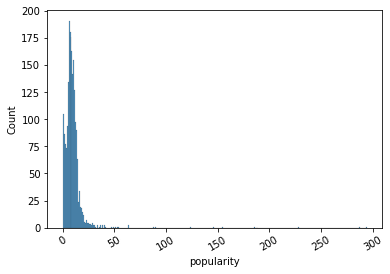

In [26]:
ax=sns.histplot(data=df5, x="popularity")
plt.xticks(rotation=30)

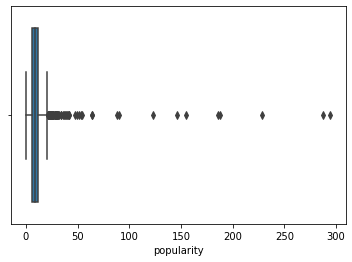

In [27]:
ax=sns.boxplot(data=df5, x="popularity")


### I also did a k-means clustering  with 2-5 numbers of clusters. It seems that three clusters are enough. But there are better methods such as elbow for establishing nimber of clusters

Text(0.5, 0.92, 'K Means')

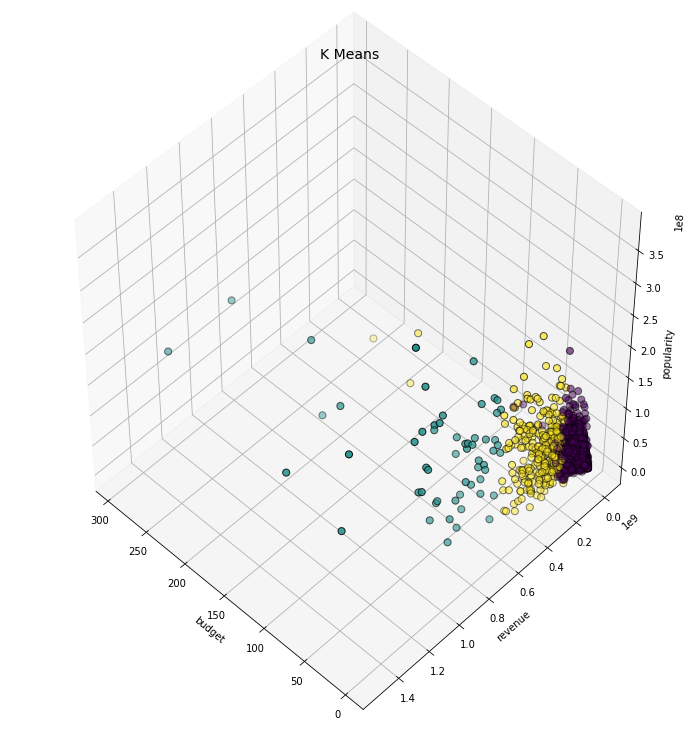

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn import datasets
#Iris Dataset
X = df5
km = KMeans(n_clusters=3)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(10,10))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X['popularity'],X['revenue'],X['budget'],  
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("budget")
ax.set_ylabel("revenue")
ax.set_zlabel("popularity")
plt.title("K Means", fontsize=14)

## q6 

### We have some users who like to be different and ‘swim against the current’. Find them the most weird movies in terms of runtime, budget, number of cast, etc. Feel free to improvise and combine the columns! Explain your results.

0        93.0
1       113.0
2       105.0
3       122.0
4       118.0
        ...  
2995    102.0
2996    102.0
2997    120.0
2998     90.0
2999    106.0
Name: runtime, Length: 3000, dtype: float64

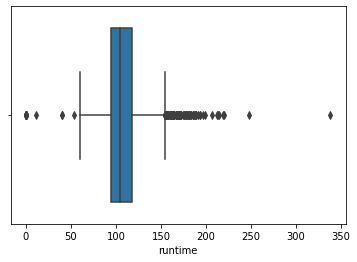

In [31]:
ax=sns.boxplot(data=df, x="runtime")
df['runtime']

In [32]:
split_dictionary = []
for j in df_to_dict:
    split_subdict = []
    for i in perfectEval(j['cast']):
        #split_one.append(i)
        new_one = {'unique_id': j['unique_id'], 'cast':i}
        split_subdict.append(new_one)
    split_dictionary.append(split_subdict)
# print(split_dictionary)
flat_split_dictionary = [item for sublist in split_dictionary for item in sublist]
dict_to_df = pd.DataFrame.from_records(flat_split_dictionary)
final_df2 = pd.concat([dict_to_df.drop(['cast'], axis=1), dict_to_df['cast'].apply(pd.Series)], axis=1)
final_df2

,unique_id,0,cast_id,character,credit_id,gender,id,name,order,profile_path
0,1,NaN,4.0,Lou,52fe4ee7c3a36847f82afae7,2.0,52997.0,Rob Corddry,0.0,/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg
1,1,NaN,5.0,Nick,52fe4ee7c3a36847f82afaeb,2.0,64342.0,Craig Robinson,1.0,/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg
2,1,NaN,6.0,Jacob,52fe4ee7c3a36847f82afaef,2.0,54729.0,Clark Duke,2.0,/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg
3,1,NaN,7.0,Adam Jr.,52fe4ee7c3a36847f82afaf3,2.0,36801.0,Adam Scott,3.0,/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg
4,1,NaN,8.0,Hot Tub Repairman,52fe4ee7c3a36847f82afaf7,2.0,54812.0,Chevy Chase,4.0,/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg
...,...,...,...,...,...,...,...,...,...,...
61845,3000,NaN,81.0,Short Sleeves,57c4602cc3a3683e8a004a6f,0.0,991960.0,Jack Erdie,29.0,/sFFUnfeU1bwdEc4XggtrfmKbi0r.jpg
61846,3000,NaN,61.0,Game Announcer,54f191f3c3a3683248001738,0.0,1432980.0,Steve Blass,30.0,None
61847,3000,NaN,62.0,Hot Dog Vendor,54f1920f9251416b350012ed,0.0,1432981.0,Derek Burnell,31.0,None
61848,3000,NaN,82.0,Woman in ER Waiting Room (uncredited),57c463c392514165f80054ac,1.0,1480130.0,Tiffany Sander McKenzie,32.0,/2Gvt77UAINub19VwqF1dxpCEqaR.jpg


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text xticklabel objects>)

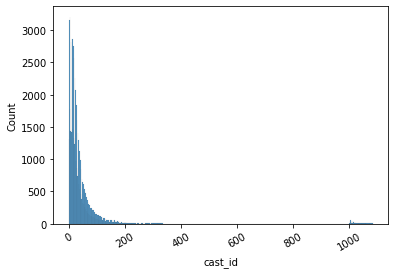

In [37]:
plot_order = final_df2.groupby('unique_id')['cast_id'].count().sort_values(ascending=False)
ax=sns.histplot(data=final_df2, x='cast_id')
plt.xticks(rotation=30)

In [38]:
final_df2['cast_count'] = final_df2.groupby('unique_id')['cast_id'].transform('count')

In [42]:
final_df3 =final_df2.groupby('unique_id').first().reset_index()

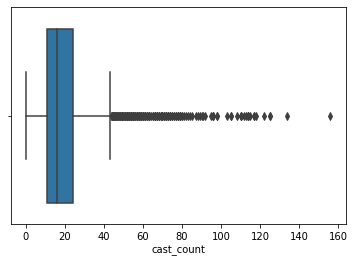

In [45]:
ax=sns.boxplot(data=final_df3, x="cast_count")

### This part could be done in many different interesting ways. The key point is using outliers! A combination of various outlires from different feature give us the most weired movies!
### Due to time limitations I haven't done this part, but it is not a hard task.